In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("netflix_titles.csv")
print(df.head)

<bound method NDFrame.head of        show_id     type                                        title  \
0     81145628    Movie      Norm of the North: King Sized Adventure   
1     80117401    Movie                   Jandino: Whatever it Takes   
2     70234439  TV Show                           Transformers Prime   
3     80058654  TV Show             Transformers: Robots in Disguise   
4     80125979    Movie                                 #realityhigh   
...        ...      ...                                          ...   
6229  80000063  TV Show                                 Red vs. Blue   
6230  70286564  TV Show                                        Maron   
6231  80116008    Movie       Little Baby Bum: Nursery Rhyme Friends   
6232  70281022  TV Show  A Young Doctor's Notebook and Other Stories   
6233  70153404  TV Show                                      Friends   

                      director  \
0     Richard Finn, Tim Maltby   
1                          NaN   
2  

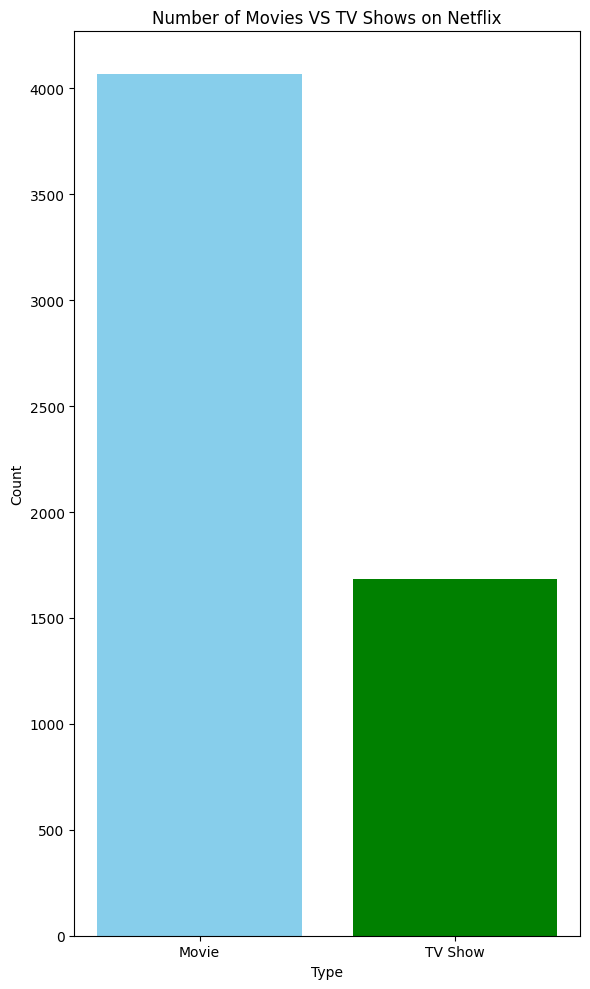

In [6]:
df=df.dropna(subset=['type','country','release_year','rating','duration'])
type_counts=df['type'].value_counts()
plt.figure(figsize=(6,10))
plt.bar(type_counts.index,type_counts.values,color=['skyblue','green'])
plt.title("Number of Movies VS TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('MoviesVSTVshows.png',dpi=300,bbox_inches='tight')
plt.show()

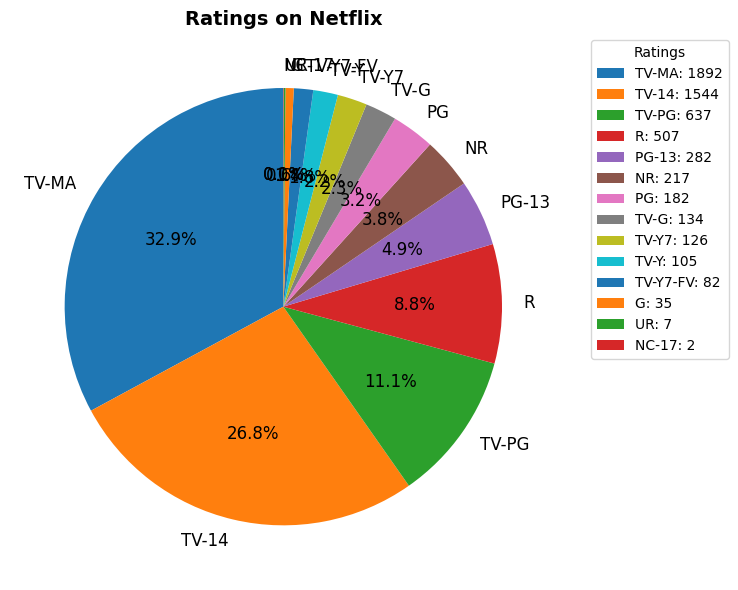

In [14]:
rating_counts = df['rating'].value_counts()

# Plot pie chart
plt.figure(figsize=(8,6))
plt.pie(
    rating_counts,
    labels=rating_counts.index,         # Show rating categories instead of counts
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12}          # Make text more readable
)

# Add title and legend
plt.title("Ratings on Netflix", fontsize=14, weight='bold')
plt.legend(
    title="Ratings",
    labels=[f"{label}: {count}" for label, count in zip(rating_counts.index, rating_counts.values)],
    bbox_to_anchor=(1.05, 1), loc='upper left'
)

# Save and show
plt.tight_layout()
plt.savefig('Ratings.png', dpi=300, bbox_inches='tight')
plt.show()


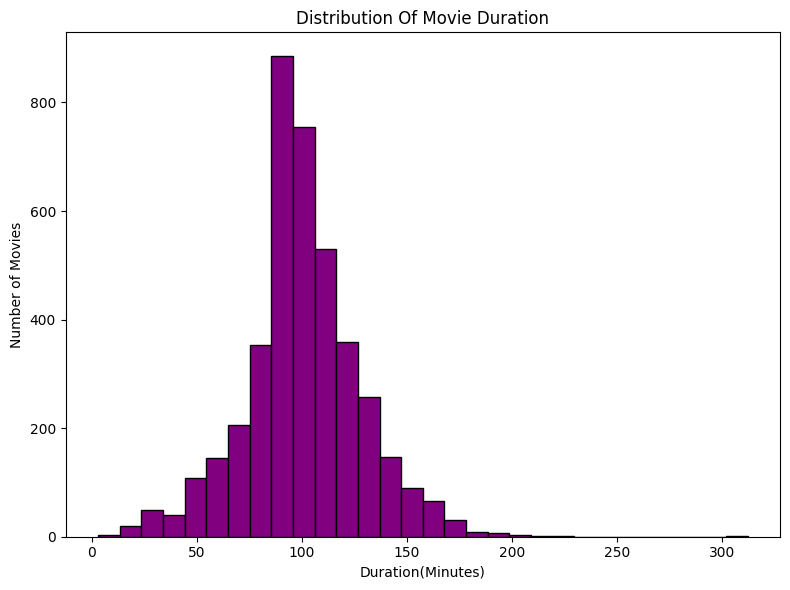

In [19]:
movie_df=df[df['type']=='Movie'].copy()
movie_df['duration_int']=movie_df['duration'].str.replace(' min','').astype(int)
plt.figure(figsize=(8,6))
movie_df['duration_int'] = movie_df['duration'].str.replace(' min', '').astype(int)
plt.title('Distribution Of Movie Duration')
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.xlabel("Duration(Minutes)")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.savefig('MoviesDuration.png',dpi=300,bbox_inches='tight')
plt.show()

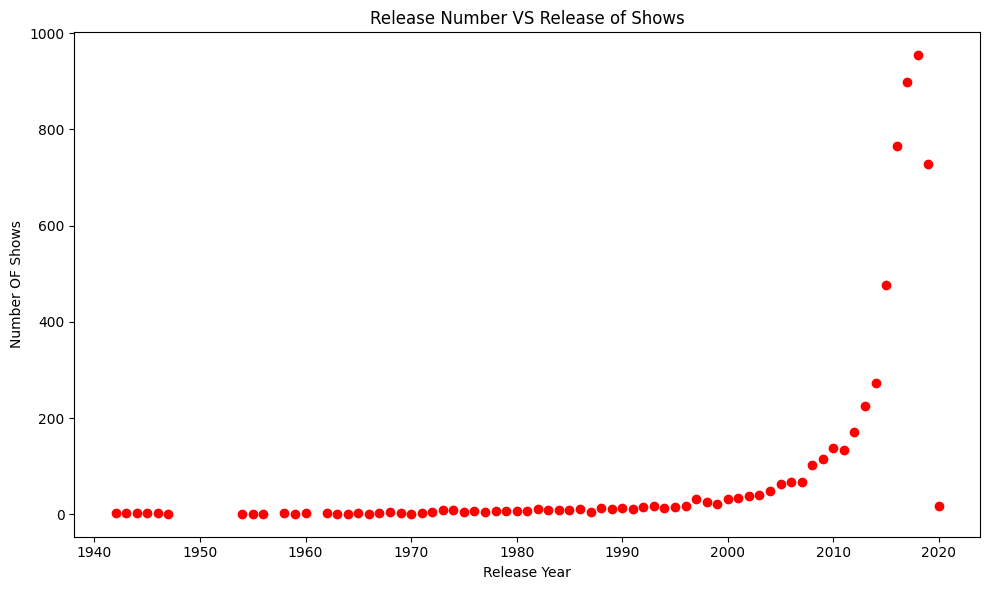

In [21]:
release_count=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_count.index,release_count.values,color='red')
plt.title("Release Number VS Release of Shows")
plt.xlabel("Release Year")
plt.ylabel("Number OF Shows")
plt.savefig("Release Number VS Release of Shows.png",dpi=300,bbox_inches='tight')
plt.tight_layout()
plt.show()

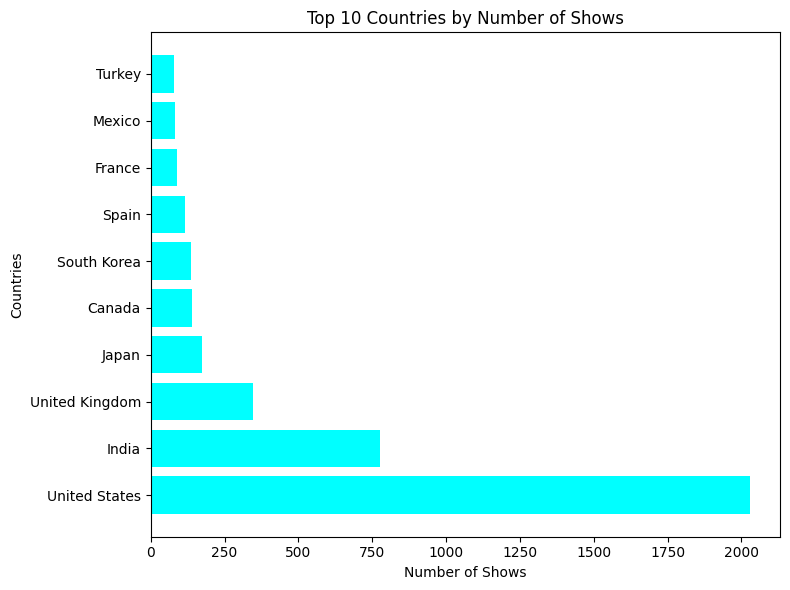

In [26]:
country_counts=df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index,country_counts.values,color='aqua')
plt.title("Top 10 Countries by Number of Shows")
plt.xlabel("Number of Shows")
plt.ylabel('Countries')
plt.savefig("TopCountries.png",dpi=300,bbox_inches='tight')
plt.tight_layout()
plt.show()

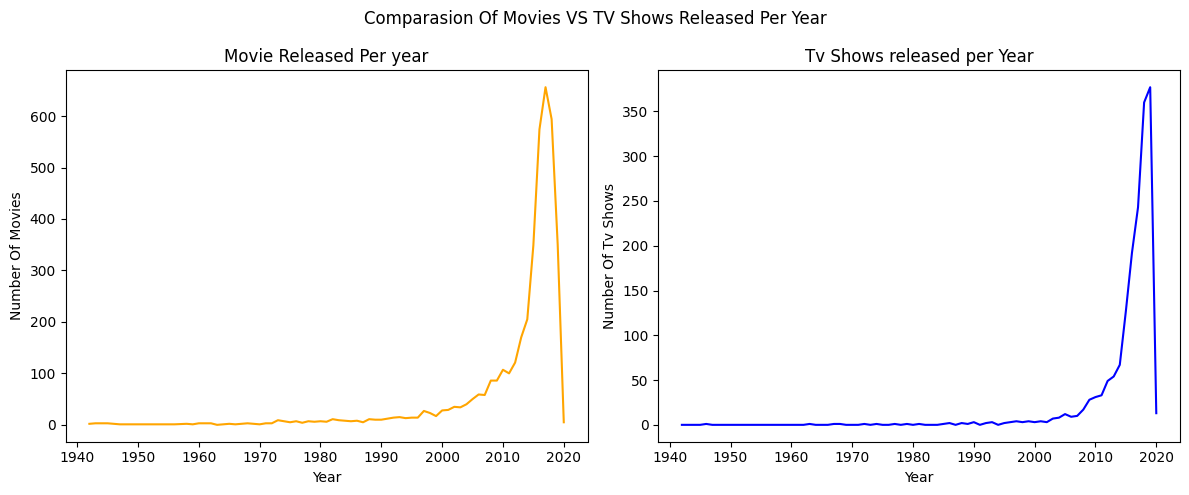

In [34]:
content_by_year=df.groupby(['release_year','type']).size().unstack().fillna(0)

fig,ax=plt.subplots(1,2,figsize=(12,5))

#first:Movie Plot
ax[0].plot(content_by_year.index,content_by_year['Movie'],color='orange')
ax[0].set_title('Movie Released Per year')
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number Of Movies")

#second:Tv Shows
ax[1].plot(content_by_year.index,content_by_year['TV Show'],color='blue')
ax[1].set_title('Tv Shows released per Year')
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Number Of Tv Shows")

fig.suptitle("Comparasion Of Movies VS TV Shows Released Per Year")
plt.tight_layout()
plt.savefig("Comparasion Of Movies VS TV Shows Released Per Year.png",dpi=300,bbox_inches='tight')
plt.show()

